# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Set figure size

In [2]:
plt.rcParams['figure.figsize'] = [10, 8]

# Model

In [3]:
pca = PCA()

# DF filled with mean and KNN

In [4]:
df = pd.read_csv('../data/0.NaNs/df_mean_knn.csv')

In [5]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,New_Visitor,Other,Returning_Visitor,PageValues
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,2.0,4.0,1.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,2.0,479.647091,0.05,0.14,0.0,2.0,3.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,2.0,3.0,3.0,1.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0


## Transform data

In [6]:
data = pca.fit_transform(df.drop(columns='Revenue', axis=1))

In [7]:
df_pca = pd.DataFrame(data, columns=['pc'+str(i) for i in range(df.drop(columns='Revenue', axis=1).shape[1])])

In [8]:
# Add target column
df_pca['Revenue'] = df.Revenue

In [9]:
df_pca.head()

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,Revenue
0,-481.989295,-51.104166,-6.907223,-19.427095,-2.742101,-4.208827,0.942304,4.907580,0.747843,-1.918689,-0.835306,-0.061088,-0.150158,-0.203354,-0.146341,0.054185,0.202592,-0.012871,4.154782e-15,0.0
1,-418.017323,-53.230286,-6.939236,-19.247165,-2.878394,-2.827885,1.465033,4.981009,0.730050,-1.857999,0.072546,-0.038818,-0.144089,-0.193674,-0.153979,0.024747,-0.009298,0.050925,2.295804e-15,0.0
2,-483.031958,-52.355612,-7.491533,-19.310897,-2.736874,-0.825387,2.758104,4.673663,0.355348,5.866356,-2.029493,-0.015452,-0.186050,-0.208912,-0.149557,0.011795,0.203052,-0.012629,1.566759e-15,0.0
3,-2.650685,-67.496747,-7.530084,-24.518337,-4.042510,-0.554671,1.616105,5.175980,0.573126,-1.017738,-0.209001,-0.033571,-0.144658,-0.193611,-0.159196,0.016280,0.063729,0.047150,-8.955250e-16,0.0
4,145.224616,-71.999472,-7.262105,-18.435645,-4.100349,-0.505537,1.657201,5.307223,0.807379,-1.872226,0.885458,-0.048973,0.043347,0.802057,-0.158267,0.007412,-0.006334,0.003736,1.903098e-16,0.0


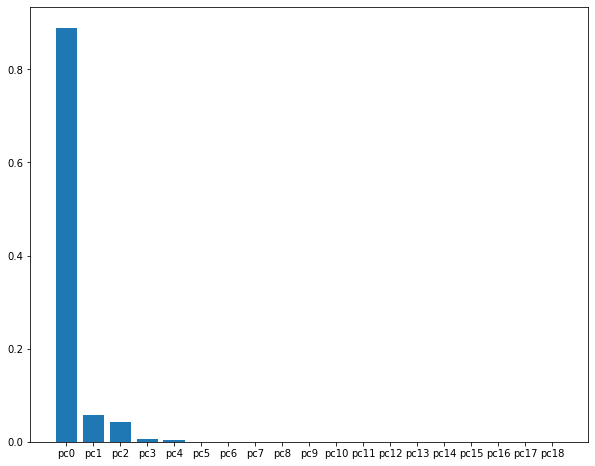

In [10]:
plt.bar(x=['pc'+str(i) for i in range(df.drop(columns='Revenue', axis=1).shape[1])], height=pca.explained_variance_ratio_);

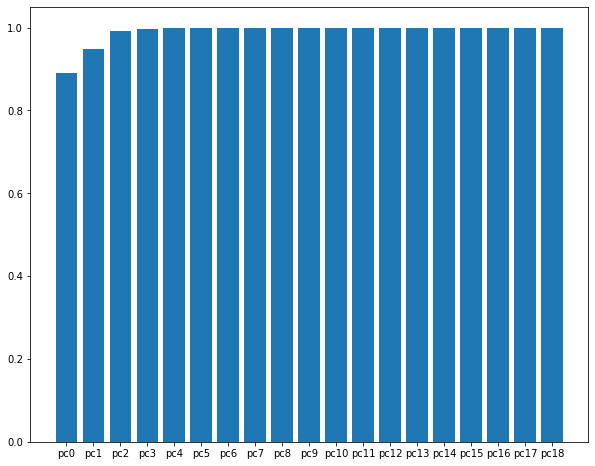

In [11]:
plt.bar(x=['pc'+str(i) for i in range(df.drop(columns='Revenue', axis=1).shape[1])], height=np.cumsum(pca.explained_variance_ratio_));

In [12]:
np.cumsum(pca.explained_variance_ratio_)

array([0.88956738, 0.94746617, 0.99076233, 0.9962628 , 0.99981389,
       0.99986513, 0.9999116 , 0.9999455 , 0.99996887, 0.99998664,
       0.9999954 , 0.9999986 , 0.99999931, 0.99999985, 0.99999996,
       0.99999999, 1.        , 1.        , 1.        ])

We can see that the first 4 components explained the 99.7% of the variance. So we can keep 4 components.

Let's obtain these new pca components to what variables they correspond:

In [13]:
componentes = pd.DataFrame(pca.components_, 
             columns=[df.drop(columns='Revenue', axis=1).columns], 
             index=['pc'+str(i) for i in range(df.drop(columns='Revenue', axis=1).shape[1])])

Let's do a heatmap to see visually the components that each new component corresponds to:

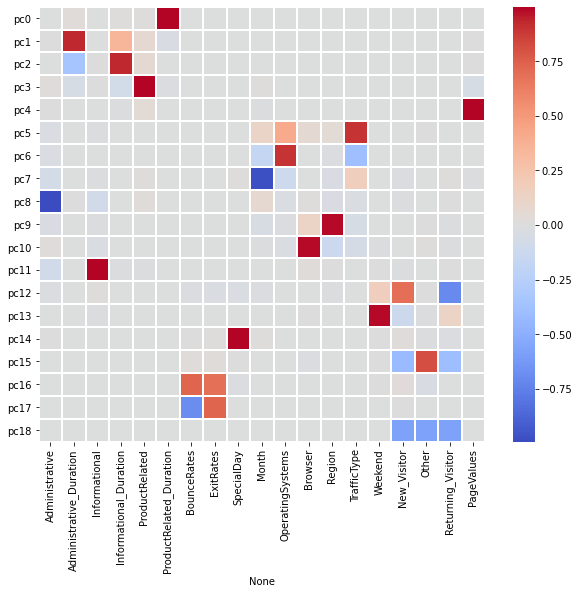

In [14]:
sns.heatmap(componentes, cmap='coolwarm', center=0, linewidths=1)

## Re-do the transformation to have only 4 components

In [19]:
pca_4 = PCA(n_components=4)
data = pca_4.fit_transform(df.drop(columns='Revenue', axis=1))
pca_df = pd.DataFrame(data, columns = ['pca_' + str(i+1) for i in range(pca_4.n_components_)])

In [20]:
pca_df.head()

,pca_1,pca_2,pca_3,pca_4
0,-481.989295,-51.104166,-6.907223,-19.427095
1,-418.017323,-53.230286,-6.939236,-19.247165
2,-483.031958,-52.355612,-7.491533,-19.310897
3,-2.650685,-67.496747,-7.530084,-24.518337
4,145.224616,-71.999472,-7.262105,-18.435645


## Export the transformed data

Add Revenue column to export all together in one csv file:

In [21]:
pca_df['Revenue'] = df['Revenue']

In [22]:
pca_df.to_csv('../data/3.PCA/pca_kmean_df.csv', index=False)

# DF filled with 0

In [23]:
df = pd.read_csv('../data/0.NaNs/df_0_oh.csv')

In [24]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,New_Visitor,Other,Returning_Visitor
0,0.0,0.0,0.0,0.0,1.0,0.0,0.20,0.20,0.0,0.0,2,1.0,1,1,1,0,0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,2.0,64.0,0.00,0.10,0.0,0.0,2,2.0,2,1,2,0,0,0.0,0.0,1.0
2,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.20,0.20,0.0,0.0,2,4.0,1,9,3,0,0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.05,0.14,0.0,0.0,2,3.0,2,2,4,0,0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,10.0,627.5,0.02,0.05,0.0,0.0,2,3.0,3,1,4,1,0,0.0,0.0,1.0


## Transform data

In [25]:
data = pca.fit_transform(df.drop(columns='Revenue', axis=1))

In [26]:
df_pca = pd.DataFrame(data, columns=['pc'+str(i) for i in range(df.drop(columns='Revenue', axis=1).shape[1])])

In [27]:
# Add target column
df_pca['Revenue'] = df.Revenue

In [28]:
df_pca.head()

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,Revenue
0,-240.551384,-56.975198,-15.816848,-26.561074,-2.307500,-4.162581,0.999301,4.947374,0.856401,-1.930669,-0.838942,-0.072481,-0.145777,-0.204253,-0.146016,0.056898,0.209778,-0.012989,5.436670e-15,0
1,-176.557574,-57.666367,-15.387076,-25.494301,-2.385666,-2.788616,1.514271,5.011138,0.819285,-1.870040,0.068023,-0.048866,-0.140556,-0.194177,-0.153734,0.026071,-0.002521,0.051817,-3.769868e-15,0
2,-241.561333,-58.200256,-16.507328,-26.461736,-2.316886,-0.777408,2.803142,4.706292,0.447526,5.855879,-2.029872,-0.025497,-0.181551,-0.210175,-0.149171,0.014523,0.210764,-0.012677,8.698297e-16,0
3,-240.551766,-56.916677,-15.749602,-25.579591,-2.293536,-0.526695,1.612973,5.225667,0.728348,-0.980324,-0.181578,-0.041021,-0.142496,-0.198097,-0.159538,0.015354,0.058872,0.046489,-2.350782e-16,0
4,386.887306,-63.793789,-11.651854,-16.873476,-3.071917,-0.537731,1.667153,5.260777,0.776132,-1.886092,0.870687,-0.048702,0.040498,0.805894,-0.158338,0.007441,-0.007824,0.003349,4.188455e-16,0


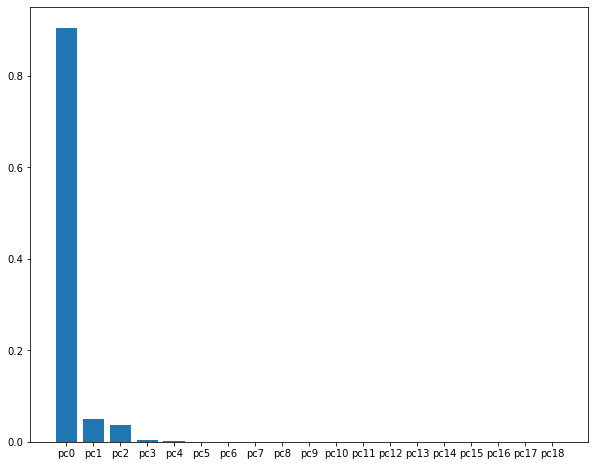

In [29]:
plt.bar(x=['pc'+str(i) for i in range(df.drop(columns='Revenue', axis=1).shape[1])], height=pca.explained_variance_ratio_);

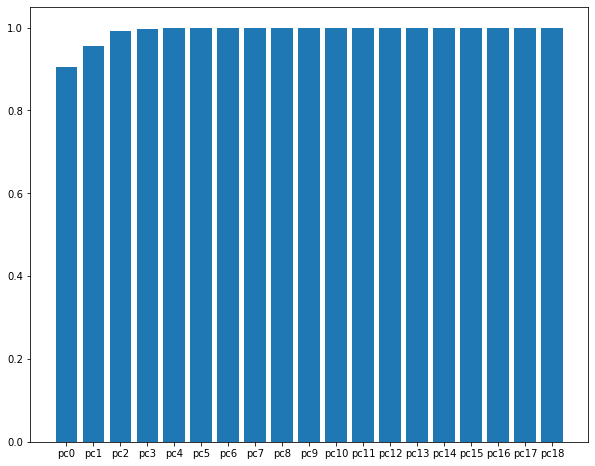

In [30]:
plt.bar(x=['pc'+str(i) for i in range(df.drop(columns='Revenue', axis=1).shape[1])], height=np.cumsum(pca.explained_variance_ratio_));

In [31]:
np.cumsum(pca.explained_variance_ratio_)

array([0.90504455, 0.95510076, 0.99259505, 0.99745061, 0.99984088,
       0.99988439, 0.99992386, 0.99995264, 0.99997353, 0.99998862,
       0.99999605, 0.99999881, 0.99999941, 0.99999987, 0.99999997,
       0.99999999, 1.        , 1.        , 1.        ])

We can see that the first 4 components explained the 99.7% of the variance. So we can keep 4 components.

Let's obtain these new pca components to what variables they correspond:

In [32]:
componentes = pd.DataFrame(pca.components_, 
             columns=[df.drop(columns='Revenue', axis=1).columns], 
             index=['pc'+str(i) for i in range(df.drop(columns='Revenue', axis=1).shape[1])])

Let's do a heatmap to see visually the components that each new component corresponds to:

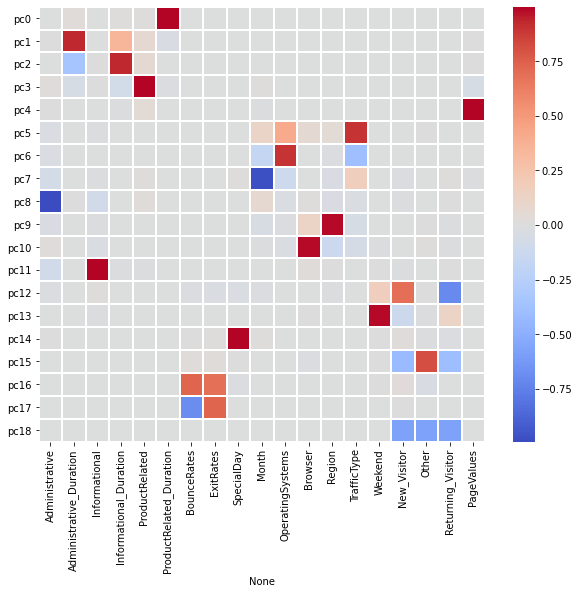

In [33]:
sns.heatmap(componentes, cmap='coolwarm', center=0, linewidths=1)

## Re-do the transformation to have only 4 components

In [32]:
pca_4 = PCA(n_components=4)
data = pca_4.fit_transform(df.drop(columns='Revenue', axis=1))
pca_df = pd.DataFrame(data, columns = ['pca_' + str(i+1) for i in range(pca_4.n_components_)])

In [33]:
pca_df.head()

,pca_1,pca_2,pca_3,pca_4
0,-240.551384,-56.975198,-15.816848,-26.561074
1,-176.557574,-57.666367,-15.387076,-25.494301
2,-241.561333,-58.200256,-16.507328,-26.461736
3,-240.551766,-56.916677,-15.749602,-25.579591
4,386.887306,-63.793789,-11.651854,-16.873476


## Export the transformed data

Add Revenue column to export all together in one csv file:

In [35]:
pca_df['Revenue'] = df['Revenue']

In [36]:
pca_df.to_csv('../data/3.PCA/pca_0_df.csv', index=False)